In [282]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format',lambda x:"%0.5f" %x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import dataset
df= pd.read_csv(r"data.csv")

df.columns = df.columns.str.strip()


print(df.columns)


Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


DATA PREPROCESSING

In [284]:
#Check the infographics of the dataset
#Inference: total entries: 1303 of which 1273 are not null(30 null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [285]:
#Counting null values
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [286]:
#Check for duplicated values
df[df.duplicated]
#inference: most duplicated values are null

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
#drop the duplicated value
df.drop_duplicates(inplace= True) #inplace= True as the changes takes place in df

In [288]:
df.isnull().sum()

Unnamed: 0          1
Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [289]:
df.dropna()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.00000,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68320
1,1.00000,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52320
2,2.00000,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00000
3,3.00000,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.33600
4,4.00000,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.80800
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.00000,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64000
1299,1299.00000,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72000
1300,1300.00000,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12000
1301,1301.00000,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92000


In [290]:
df.isnull().sum()

Unnamed: 0          1
Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [291]:

print(df.columns)


Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [292]:
# Unnamed: 0 "MIGHT" be abstacted value of senstive data and it is not useful for the data analysis
df.drop(columns='Unnamed: 0',inplace=True)

In [293]:
df.isnull().sum() #the dropna function for some reason is not dropping one particular row for some reason

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [294]:
df[df['Cpu'].isnull()] #identifying the column 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
df.drop(index= 20, inplace= True) #dropping that particular row using drop function

In [296]:
df[df['Cpu'].isnull()] #double checking the null values

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [297]:
# There is no seperate company as Vero, Aspire is the parent company of Vero so, changing the name of Vero to Aspire in the 'Company' column
df['Company']= df['Company'].apply(lambda x: "Aspire" if x=='Vero' else x)

In [298]:
print(df['Inches'].unique()) #Inches column has an unknown value "?"
df[df['Inches']=='?'] #locating the rows containing "?"

['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24000


In [299]:
df.drop(index=df[df['Inches']=='?'].index[0], inplace= True) #dropping columns containing "?"

In [300]:
#Screen resolution has various details regarding the type of screen, we will only take the part which contains pixel values (width x height)
df['ScreenResolution']= df['ScreenResolution'].apply(lambda x: x.split(" ")[-1]) 

In [301]:
df['ScreenResolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1272, dtype: object

In [302]:
# Cpu column has details like brand, generation and so on, for analysis we will only take clock speed
df['Cpu']= df['Cpu'].apply(lambda x: float(x.split(" ")[-1][0:-3])) 

In [303]:
df['Cpu']

0      2.30000
1      1.80000
2      2.50000
3      2.70000
4      3.10000
         ...  
1298   2.50000
1299   2.50000
1300   1.60000
1301   2.50000
1302   1.60000
Name: Cpu, Length: 1272, dtype: float64

In [304]:
#Ram object has its size defined commonly in GB, to prevent encoding we will only consider the amount of Ram 
df['Ram']= df['Ram'].apply(lambda x: x[0:-2]).astype('int')

df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1272, dtype: int32

In [305]:
df['Memory'].unique() #Memory has "?"

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [306]:
df.drop(index=df[df['Memory']=='?'].index[0], inplace= True)

#memory column has info like size and type of memory, splitting the memory column into two will give us more features

In [307]:
#Extracting Memory size from the memory column
df['ROM(GB)']= df['Memory'].apply(lambda x: x.split(" ")[0][0:-2]).replace({'1':'1000', '1.0': '1000', '2':'2000'}).astype('int')

In [308]:
df['ROM(GB)']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: ROM(GB), Length: 1271, dtype: int32

In [309]:
#Extracting memory type from the memory column 
df['Storage Type']= df['Memory'].apply(lambda x: x.split(" ")[1])

In [310]:
#dropping memory column as its not needed anymore
df.drop(columns= 'Memory', inplace= True)

In [311]:
print(df['Weight'].unique()) #weight has "?" in its row
df.drop(index=df[df['Weight']=="?"].index[0],inplace=True)

In [312]:
#Weight is in form of 1.23kg {value, unit} we will only extract the value, while leaving out the unit 
df['Weight']= df['Weight'].apply(lambda x: x[:-2]).astype('float')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1270 non-null   object 
 1   TypeName          1270 non-null   object 
 2   Inches            1270 non-null   object 
 3   ScreenResolution  1270 non-null   object 
 4   Cpu               1270 non-null   float64
 5   Ram               1270 non-null   int32  
 6   Gpu               1270 non-null   object 
 7   OpSys             1270 non-null   object 
 8   Weight            1270 non-null   float64
 9   Price             1270 non-null   float64
 10  ROM(GB)           1270 non-null   int32  
 11  Storage Type      1270 non-null   object 
dtypes: float64(3), int32(2), object(7)
memory usage: 119.1+ KB


In [314]:
#GPU columns has various divisions and will make the process of analysis hard, so lets drop it for the ease of analysis
df.drop(columns= 'Gpu', inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1270 non-null   object 
 1   TypeName          1270 non-null   object 
 2   Inches            1270 non-null   object 
 3   ScreenResolution  1270 non-null   object 
 4   Cpu               1270 non-null   float64
 5   Ram               1270 non-null   int32  
 6   OpSys             1270 non-null   object 
 7   Weight            1270 non-null   float64
 8   Price             1270 non-null   float64
 9   ROM(GB)           1270 non-null   int32  
 10  Storage Type      1270 non-null   object 
dtypes: float64(3), int32(2), object(6)
memory usage: 109.1+ KB


In [315]:
#Converting Datatypes
df['Inches']= df['Inches'].astype('float')
df['Cpu']=df['Cpu'].astype('float')

In [316]:
df['Cpu']

0      2.30000
1      1.80000
2      2.50000
3      2.70000
4      3.10000
         ...  
1298   2.50000
1299   2.50000
1300   1.60000
1301   2.50000
1302   1.60000
Name: Cpu, Length: 1270, dtype: float64

DATA VISUALIZATION

<Figure size 1200x500 with 0 Axes>

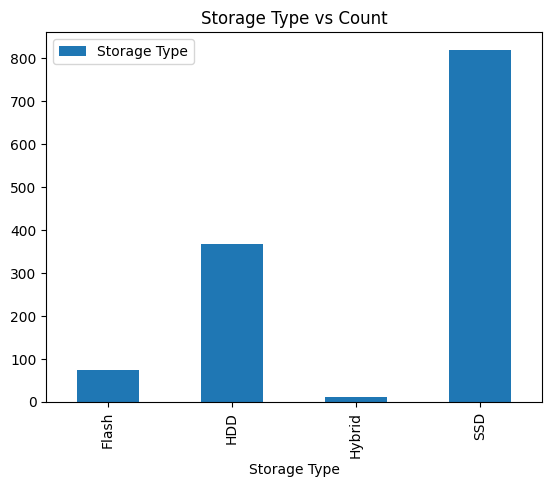

In [317]:
#Comparing usage of different storage types

plt.figure(figsize=(12,5))
df.groupby(by='Storage Type')[['Storage Type']].count().plot(kind='bar')
plt.title("Storage Type vs Count")
plt.show()

INFERENCE: we can see that SSD is the most used storage type

<Figure size 1200x500 with 0 Axes>

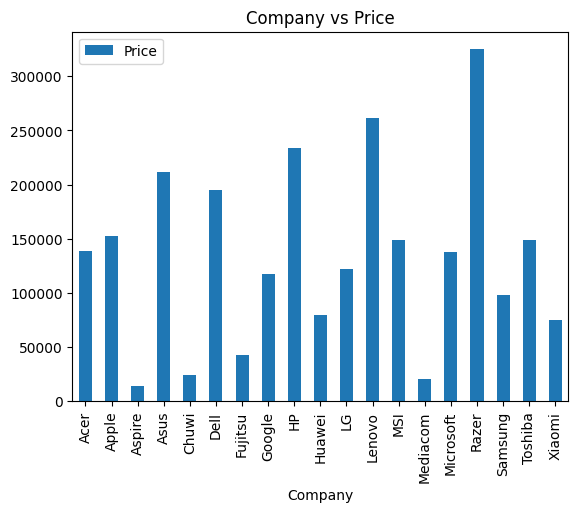

In [318]:
#comparing prices of different companies
plt.figure(figsize=(12,5))
df.groupby(by= 'Company')[['Price']].max().plot(kind='bar')
plt.title("Company vs Price")
plt.show()

INFERENCE: Razor has the most priciest laptops among the following brands

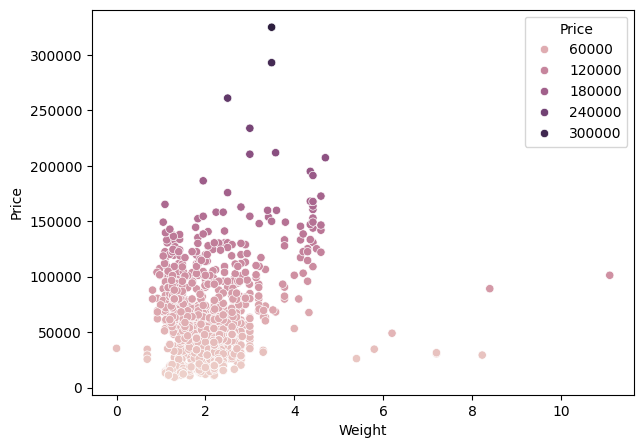

In [319]:
#Influence of Weight of laptop towards price
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Weight', y='Price', hue='Price')
plt.show()

INFERENCE: Higher the weight of the laptop, the higher the price (as powerful cpus and gpus would require better cooling system Hence, resulting in more weight)

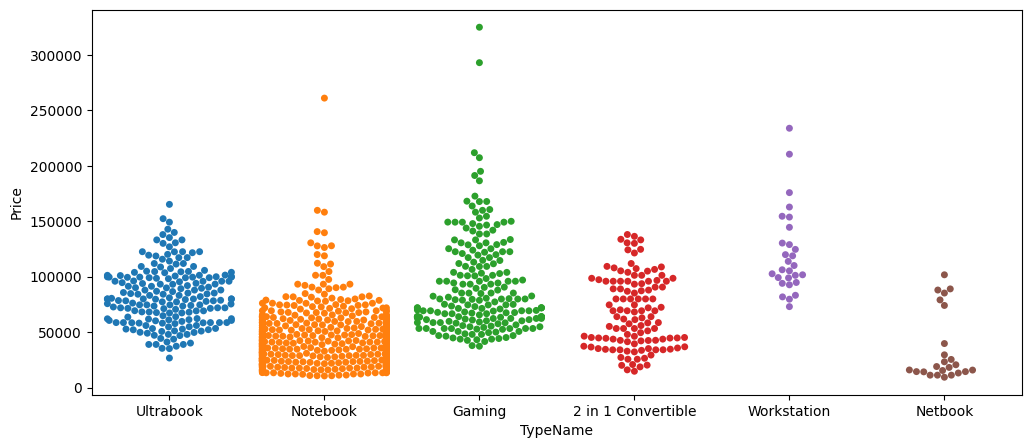

In [320]:
#Type of laptop vs price
plt.figure(figsize=(12,5))
sns.swarmplot(data=df, x=df['TypeName'], y=df['Price'], hue= df['TypeName'])

plt.show()

INFERENCE: Gaming Laptops costs more than any other laptops(even the base price tends to be higher)

<Figure size 1200x500 with 0 Axes>

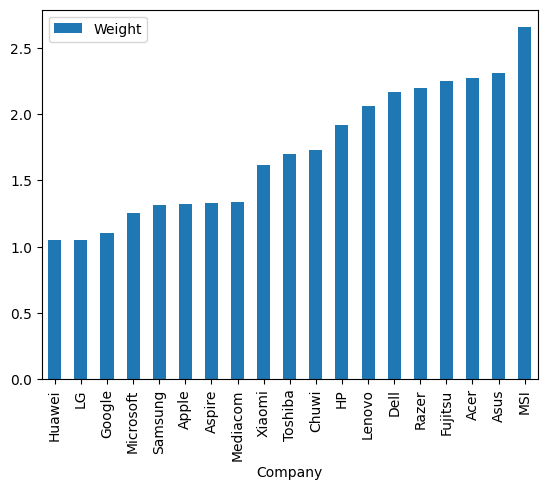

In [321]:
#Company vs Weight
plt.figure(figsize=(12, 5))
df.groupby(by= 'Company')[['Weight']].mean().sort_values(by='Weight').plot(kind='bar')
plt.show()

MSI (typically a gaming laptop company) offers the heaviest laptops being contradictory to LG and Huawei, which offers the lightest laptops

In [322]:
df.head

<bound method NDFrame.head of      Company            TypeName   Inches ScreenResolution     Cpu  Ram  \
0      Apple           Ultrabook 13.30000        2560x1600 2.30000    8   
1      Apple           Ultrabook 13.30000         1440x900 1.80000    8   
2         HP            Notebook 15.60000        1920x1080 2.50000    8   
3      Apple           Ultrabook 15.40000        2880x1800 2.70000   16   
4      Apple           Ultrabook 13.30000        2560x1600 3.10000    8   
...      ...                 ...      ...              ...     ...  ...   
1298  Lenovo  2 in 1 Convertible 14.00000        1920x1080 2.50000    4   
1299  Lenovo  2 in 1 Convertible 13.30000        3200x1800 2.50000   16   
1300  Lenovo            Notebook 14.00000         1366x768 1.60000    2   
1301      HP            Notebook 15.60000         1366x768 2.50000    6   
1302    Asus            Notebook 15.60000         1366x768 1.60000    4   

           OpSys  Weight        Price  ROM(GB) Storage Type  
0      

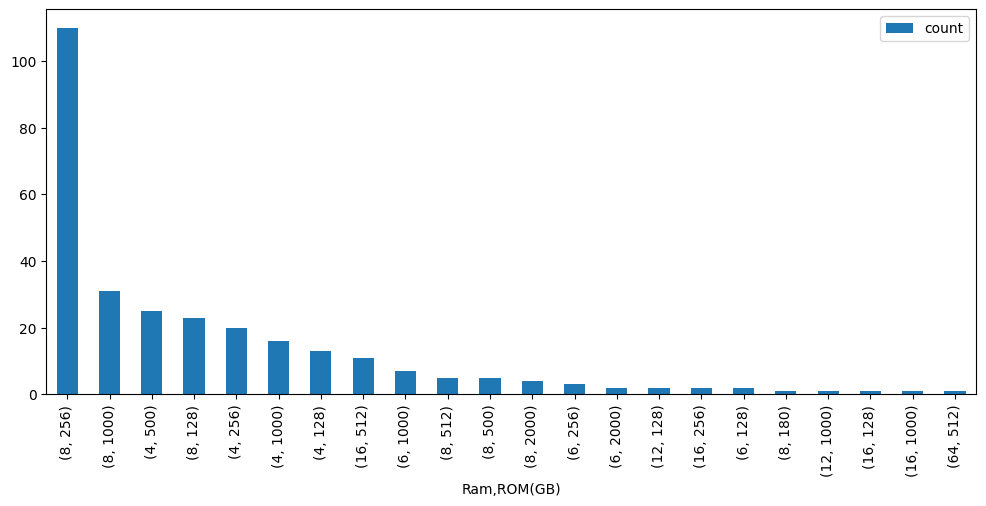

In [323]:
#Ram & ROM combination
plt.figure(figsize=(12,5))
df[df['Cpu']==2.5][['Ram','ROM(GB)']].value_counts().plot(kind='bar')
plt.legend()
plt.show()

MODEL CREATION

In [324]:
# defining category columns and numerical columns
cat_cols= df.select_dtypes(include="object").columns 
print(cat_cols)
# num_cols= df.select_dtypes(include="int", 'float').columns 
num_cols= ['Inches', 'Cpu', 'Ram', 'Weight', 'ROM(GB)']

Index(['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'Storage Type'], dtype='object')


In [325]:
#Splitting Independent and Dependent Variables
X= df.drop(columns='Price', axis=1)
y= df['Price']


In [326]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.15,random_state= 42)

In [327]:
#Defining Encoder and Scalar in objects 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

oc = OrdinalEncoder()
sc= StandardScaler()


In [328]:
#Scaling numerical columns
X_train_scaled= sc.fit_transform(X_train[num_cols])
X_test_scaled= sc.fit_transform(X_test[num_cols])
X_train_= X_train[num_cols]
X_test_= X_test[num_cols]


In [329]:
#Scaling encoding columns
X_train_enc= oc.fit_transform(X_train[cat_cols])
X_test_enc= oc.fit_transform(X_test[cat_cols])

In [330]:
#Checking shape of scaled and encoded columns for stacking them
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_train_enc shape:", X_train_enc.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("X_test_enc shape:", X_test_enc.shape)


X_train_scaled shape: (1079, 5)
X_train_enc shape: (1079, 5)


In [331]:
#Grouping scaled and encoded data
X_trainn= np.hstack((X_train_scaled, X_train_enc))
X_testt=np.hstack((X_test_scaled, X_test_enc))

In [332]:
#Importing Regression Models for regression
en= ElasticNet(alpha= 1.0, l1_ratio=0.5, random_state= 42)
rf= RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
gb= GradientBoostingRegressor(n_estimators=250, learning_rate=0.5, max_depth=15, random_state=42)


In [333]:
#Training the models
en.fit(X_trainn, y_train)
rf.fit(X_trainn, y_train)
gb.fit(X_trainn, y_train)


GradientBoostingRegressor(learning_rate=0.5, max_depth=15, n_estimators=250,
                          random_state=42)

In [334]:
#Predicting the testing variable
en_pred= en.predict(X_testt)
rf_pred= rf.predict(X_testt)
gb_pred= gb.predict(X_testt)

In [335]:
#Evaluating the models
print("Elastic Net Score: ",en.score(X_testt, y_test)*100)
print("Random Forest Score: ",rf.score(X_testt, y_test)*100)
print("Gradient Boosting Score: ",gb.score(X_testt, y_test)*100)
#We came to know that Random Forest Regressor performs the best from the upfound scores (r2 scores)


Elastic Net Score:  61.17772660086294
Random Forest Score:  74.28044794501551
Gradient Boosting Score:  58.90965027157778


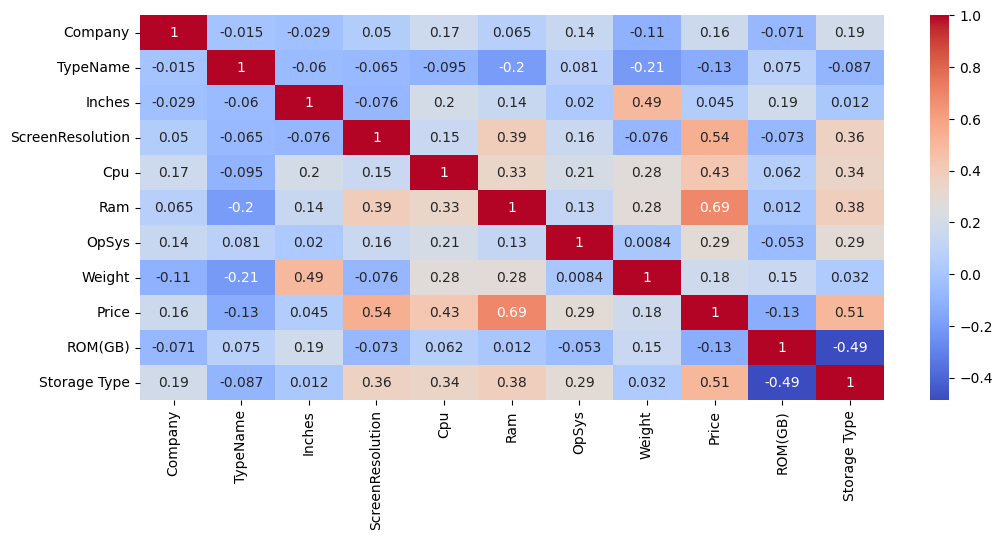

In [336]:
#TO FIND HIGHLY CORRELATED FEATURES, LETS PLOT A CONFUSION MATRIX AMONG THE FEATURES
enc_df= df.copy()
enc_df[cat_cols]= oc.fit_transform(enc_df[cat_cols])
plt.figure(figsize=(12,5))
sns.heatmap(enc_df.corr(),annot=True, cmap= 'coolwarm')
plt.show()

In [337]:
#BY LOOKING THESE VALUES {OR COLOUR} INTENSITY WE CAN FIND THE POSTIVE AND NEGATIVE CORRELATIONS 
# INFERENCE: HIGHLY CORRELATED FEATURES ARE: STORAGE TYPE, CPU, RAM, SCREENRESOLUTION

#LETS PREDICT THE PRICE USING ONLY THESE FEATURES
selected_features= ['Storage Type', 'Cpu', 'Ram', 'ScreenResolution', 'Price']
select_df= df[selected_features]
X_select = select_df.drop(columns=['Price'])  
y_select = select_df['Price']  


enc_cols = ['Storage Type', 'ScreenResolution']
sca_cols=['Cpu','Ram']

rfs= RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

X_select_train, X_select_test, y_select_train, y_select_test = train_test_split(X_select, y_select, test_size=0.15, random_state=42)
X_select_train[enc_cols] = oc.fit_transform(X_select_train[enc_cols])
X_select_test[enc_cols] = oc.fit_transform(X_select_test[enc_cols])
X_select_train[sca_cols]= sc.fit_transform(X_select_train[sca_cols])
X_select_test[sca_cols]= sc.fit_transform(X_select_test[sca_cols])


# Fit the RandomForestRegressor model
rfs.fit(X_select_train, y_select_train)

# Make predictions
rfs_pred = rfs.predict(X_select_test)
print("The score of RandomForestRegressor in selected features: ", rfs.score(X_select_test, y_select_test)*100)

The score of RandomForestRegressor in selected features:  41.28493882719031


In [338]:
eval_metrics = pd.DataFrame(data=[en.score(X_testt, y_test)*100, rf.score(X_testt, y_test)*100, gb.score(X_testt, y_test)*100],
                                  columns=['R2 Score'],
                                  index= ['ElasticNet Score', 'RandomForest Score', 'GradientBoosting Score'])
eval_metrics

,R2 Score
ElasticNet Score,61.17773
RandomForest Score,74.28045
GradientBoosting Score,58.90965
